In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Begin5 START OF MODULE FIVE #########################
#
# There are 3 files in Module 5 with 62 students.Module has attendance, quizzes.
# 33 students passed this module with 30 students failing.
# There are 6 assignments, attendance, quizzes and MCQ test in module 5.
#

In [7]:
# Data Preperation Module 5
# 2 files in Module5
# Module 5

module5ml = pd.read_csv('Module5_Moodle_Logs.csv')

In [8]:
module5mg = pd.read_csv('Module5_Moodle_Grades.csv')

In [9]:
print (module5mg.columns.tolist())
# Full list of Columns for module 5

['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Assignment 1 image of poster (Real)', 'Assignment: Assignment 1  S  (Real)', 'Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment:   Task 1 (Real)', 'Assignment:   Task 2 (Real)', 'Assignment:   Task 3 (Real)', 'Assignment: Lab 1 S(Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment: Repeat assignment grading (Real)', 'Assignment: Submit repeat exam (Real)', 'Assignment: Upload Headshot (Real)', 'Assignment: v upload (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']


In [10]:
# Print the number of unique values in each modul5ml column
print(module5ml.nunique())

Time              5156
User full name      63
Affected user        1
Event context       82
Component           14
Event name          32
Description         73
Origin               2
IP address           1
dtype: int64


In [11]:
# Print the number of unique values in each modul5mg column
print(module5mg.nunique())

First name                                         63
Surname                                            63
ID number                                          63
Email address                                      63
Course total (Real)                                62
Last downloaded from this course                    2
Assignment: Assignment 1 image of poster (Real)     1
Assignment: Assignment 1  S  (Real)                 1
Assignment: Assignment 1 T (Real)                  13
Assignment: Assignment 2 - Submit (Real)           28
Assignment: FG (Real)                               2
Assignment:   Task 1 (Real)                         1
Assignment:   Task 2 (Real)                         1
Assignment:   Task 3 (Real)                         1
Assignment: Lab 1 S(Real)                           1
Assignment: Pre-submission meeting (Real)           2
Assignment: Repeat assignment grading (Real)        1
Assignment: Submit repeat exam (Real)               1
Assignment: Upload Headshot 

In [12]:
# time5
time5 = module5ml["Time"].str.split(",", n = 1, expand = True)

In [13]:
# making separate Date column from new data frame 
module5ml["Date"]= time5[0] 

# making seperate Time column from new data frame
module5ml['Time']= time5[1]


In [14]:
# Convert the date column to datetime64
module5ml.Date = pd.to_datetime(module5ml.Date)

In [15]:
len(module5ml)

14049

In [16]:
#Remove activity outside semester start and end dates range -Timeedit5
mask5 = (module5ml['Date'] >= StartDate) & (module5ml['Date'] <= EndDate)

module5ml = module5ml.loc[mask5]

len(module5ml)

9016

In [17]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_5 = (module5ml['Date'] >= StartDate) & (module5ml['Date'] <= TriOne)

FirstFive5 = module5ml.loc[week5_5]

len(FirstFive5)


2284

In [18]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_5 = (module5ml['Date'] >= TriOne) & (module5ml['Date'] <= TriTwo)

FirstTen5 = module5ml.loc[week10_5]

len(FirstTen5)


5333

In [19]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_5 = (module5ml['Date'] >= TriTwo) & (module5ml['Date'] <= EndDate)

FirstFivt5 = module5ml.loc[week15_5]

len(FirstFivt5)


1529

In [20]:
module5ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [21]:
#Splituser5
# new data frame with split value columns 
new5 = module5ml["User full name"].str.split(" ", n = 1, expand = True)


In [22]:
# making separate first name column from new data frame 
module5ml["First name"]= new5[0] 

# making separate last name column from new data frame 
module5ml["Last name"]= new5[1] 


In [24]:
module5ml.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address,Date,First name,Last name
3,14:26,aI1T bxjW,-,Assignment: Assignment 1 T,Assignment,The status of the submission has been viewed.,The user with id '0' has viewed the submission...,web,127.0.0.1,2019-01-03,aI1T,bxjW
4,14:26,aI1T bxjW,-,Course: Module 5,System,Course user report viewed,The user with id '0' viewed the user report fo...,web,127.0.0.1,2019-01-03,aI1T,bxjW


In [25]:
#m5ml_subset
m5ml_subset = module5ml.drop(module5ml[['IP address','Origin','Description','Affected user']], axis=1)

In [26]:
#onehot5
module5ml_onehot = m5ml_subset.copy()
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Event name'], prefix = ['Event name'])
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Event context'], prefix = ['Event context'])
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Component'], prefix = ['Component'])


print(module5ml_onehot.head())


      Time User full name       Date First name Last name  \
3    14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   
4    14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   
5    09:19      aA6B bBfk 2019-01-03       aA6B      bBfk   
6    09:17      aA6B bBfk 2019-01-03       aA6B      bBfk   
52   10:04      a3xG bp9L 2019-01-02       a3xG      bp9L   

    Event name_A file has been uploaded.  \
3                                      0   
4                                      0   
5                                      0   
6                                      0   
52                                     0   

    Event name_A submission has been submitted.  \
3                                             0   
4                                             0   
5                                             0   
6                                             0   
52                                            0   

    Event name_An online text has been uploaded.  \
3        

In [28]:
m5mg = module5mg[['First name', 'Surname', 'ID number', 'Course total (Real)','Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']]

In [29]:
#Engaged = > 55
engaged5 = m5mg['Course total (Real)'] > 55


In [30]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m5mg['engaged'] = np.where(m5mg['Course total (Real)']>=55, '1', '0')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
m5mg['engaged'] = pd.to_numeric(m5mg['engaged'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
print(m5mg['engaged'].value_counts(dropna=False))

0    39
1    24
Name: engaged, dtype: int64


In [33]:
m5mg.dtypes

First name                                    object
Surname                                       object
ID number                                     object
Course total (Real)                          float64
Assignment: Assignment 1 T (Real)              int64
Assignment: Assignment 2 - Submit (Real)     float64
Assignment: FG (Real)                          int64
Assignment: Pre-submission meeting (Real)      int64
Assignment 1 Non-Linear S total (Real)       float64
Assignment 2 V total (Real)                  float64
Attendance: Attendance (Real)                float64
MCQ Test total (Real)                        float64
Quiz: MCQ 2018 (Real)                        float64
engaged                                        int64
dtype: object

In [35]:
m5mg_subset = m5mg

In [36]:
merge_subset5 = pd.merge(module5ml_onehot,m5mg_subset[['First name','engaged']],on='First name', how='left')

In [37]:
merge_subset5.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Badge listing viewed,Event name_Comment created,...,Component_Folder,Component_Forum,Component_Online text submissions,Component_Overview report,Component_Page,Component_Submission comments,Component_System,Component_URL,Component_User report,engaged
0,14:26,aI1T bxjW,2019-01-03,aI1T,bxjW,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14:26,aI1T bxjW,2019-01-03,aI1T,bxjW,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
X5s = merge_subset5.iloc[:,5:123]  #independent columns
y5s = merge_subset5.iloc[:,-1]    #target column i.e engaged


In [39]:
X5s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Badge listing viewed,Event name_Comment created,Event name_Comment deleted,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,...,Component_File submissions,Component_Folder,Component_Forum,Component_Online text submissions,Component_Overview report,Component_Page,Component_Submission comments,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [40]:
y5s.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [41]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X5s,y5s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X5s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                           Specs      Score
36            Event context_Assignment: v upload  38.101034
110                              Component_Forum  15.486591
83               Event context_Forum: News forum  12.625766
26   Event context_Assignment: Assignment 1    T  11.729773
22                   Event name_User list viewed   9.854485
7                Event name_Course module viewed   9.600609
11                  Event name_Discussion viewed   8.272923
13           Event name_Grade user report viewed   7.841655
117                        Component_User report   7.841655
108                   Component_File submissions   7.810321


[  4.54284611e-03   9.72567046e-03   9.40187569e-04   5.54698618e-03
   4.01882209e-03   9.85897818e-04   9.95477441e-03   2.88184755e-02
   1.98782062e-03   3.76488889e-04   7.51789440e-03   2.45841854e-03
   8.95363669e-04   2.05888795e-02   8.66999852e-04   2.22133681e-03
   8.29898180e-03   9.69702421e-03   1.31175670e-02   2.03292469e-02
   2.02107704e-02   1.02460128e-03   3.83929635e-02   6.45807852e-03
   5.66207230e-04   4.02731887e-03   5.36326234e-02   7.86117071e-03
   6.23774163e-03   1.18819657e-02   8.02978167e-03   4.16475056e-03
   3.74583405e-02   1.08811431e-02   5.78078447e-03   1.13718125e-02
   1.26525628e-01   1.30745139e-02   2.97291800e-04   1.00560994e-02
   5.03090463e-04   3.43762782e-03   1.64282068e-03   2.32494316e-03
   3.37532456e-04   1.65046394e-02   1.61259398e-03   6.77393672e-03
   6.78042774e-03   4.25200162e-03   2.24879060e-04   6.44611703e-03
   5.76146546e-03   1.33576671e-02   1.72481619e-04   1.00485991e-03
   8.10651442e-04   5.90375566e-03

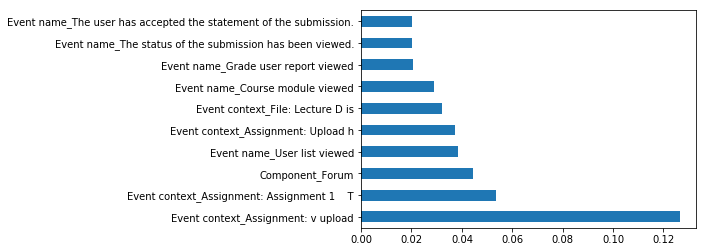

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X5s,y5s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X5s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
#get correlations of each features in dataset
corrmat = merge_subset5.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset5[top_corr_features].corr(),annot=True,cmap="RdYlGn")
